# Image Segmentation by clustering pixels

## K-means Clustering for Image Segmentation

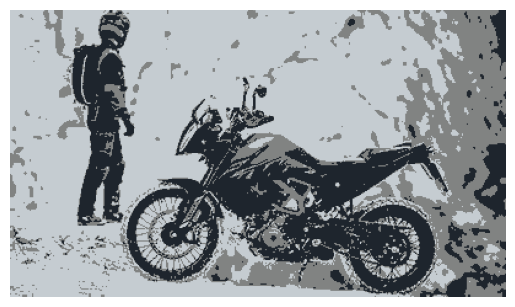

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('C:\\Users\\madho\\Desktop\\download.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert to float for K-means
pixels = np.float32(pixels)

# Define criteria and apply K-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to integer values
centers = np.uint8(centers)

# Map labels to original image dimensions
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

## DBScan Clustering for Image Segmentation

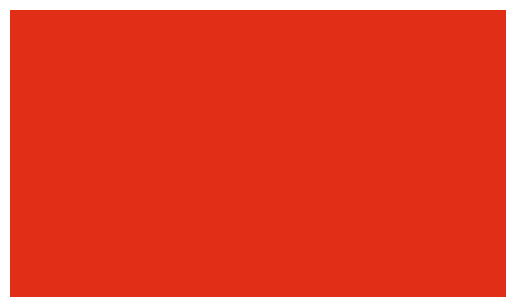

In [5]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

# Load and preprocess the image
image = cv2.imread('C:\\Users\\madho\\Desktop\\download.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape image to a 2D array of pixels
height, width, channels = image.shape
pixels = image.reshape((-1, 3))

# Normalize pixel values
pixels = pixels / 255.0

# Add spatial coordinates as features
x, y = np.meshgrid(np.arange(width), np.arange(height))
coordinates = np.stack((x.ravel(), y.ravel()), axis=1)
features = np.concatenate((pixels, coordinates), axis=1)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=50, metric='euclidean')
labels = dbscan.fit_predict(features)

# Map cluster labels to pixel colors
unique_labels = np.unique(labels)
segmented_image = np.zeros_like(image)

# Assign a random color to each cluster
for label in unique_labels:
    if label == -1:  # Noise
        color = [0, 0, 0]  # Black for noise
    else:
        color = np.random.randint(0, 255, size=3)
    segmented_image[labels.reshape(height, width) == label] = color

# Display the segmented image
plt.imshow(segmented_image)
plt.axis('off')
plt.show()